In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#importing csv file
wine = pd.read_csv("redWineDataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


/home/chan/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chan/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chan/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chan/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

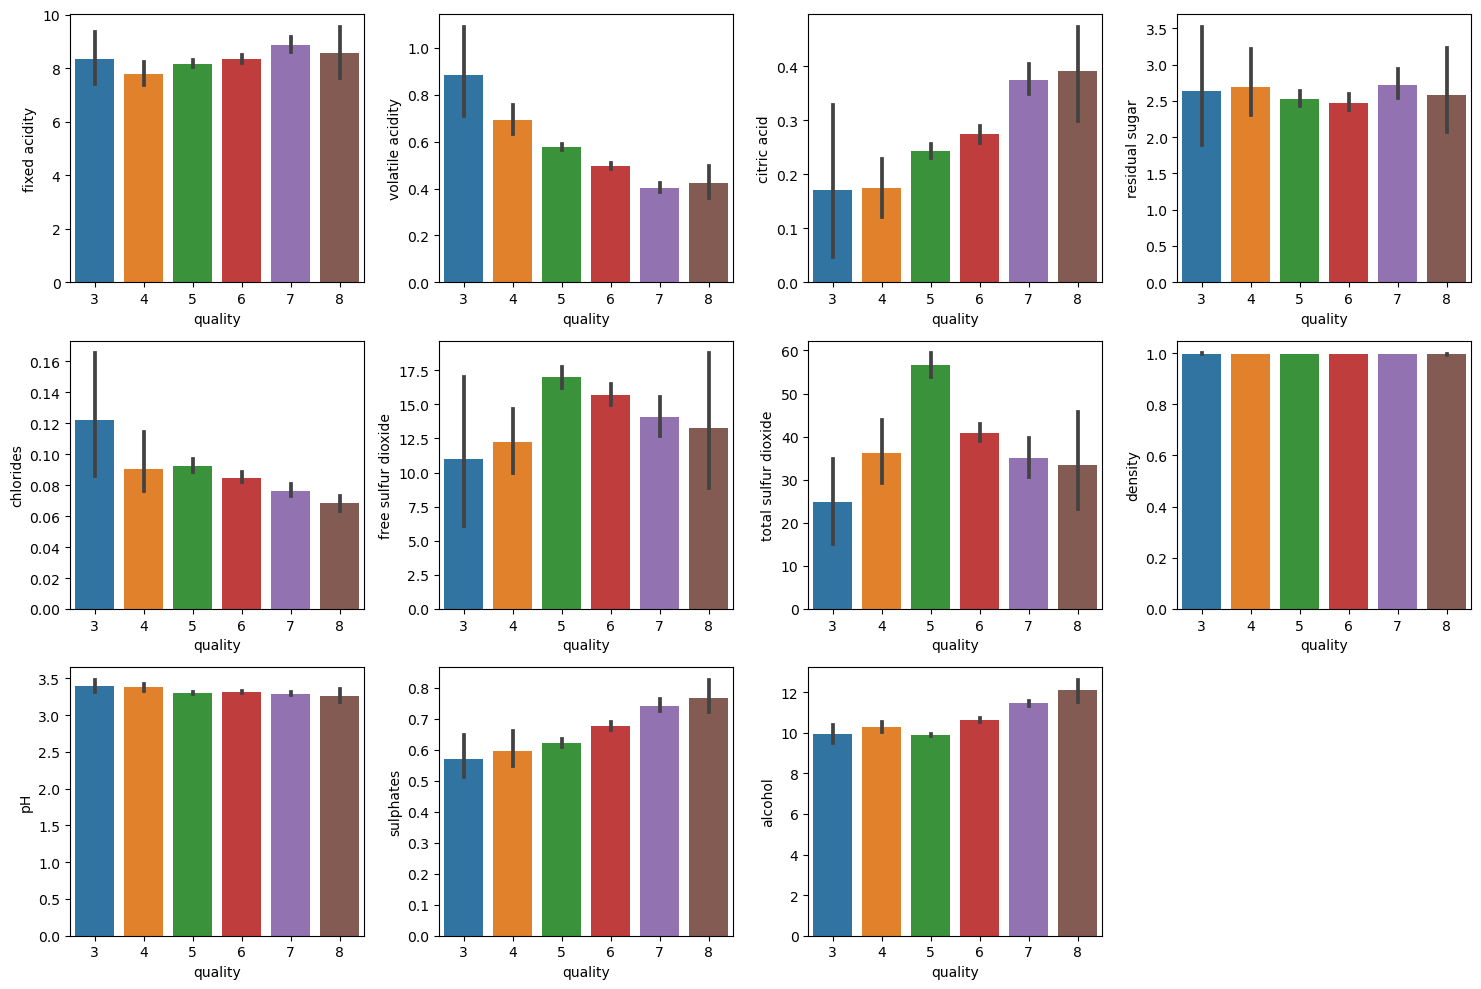

In [3]:
#Exploratory Data Analysis

wine.describe()
wine.info()

fig = plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
sns.barplot(x="quality", y="fixed acidity", data=wine)

plt.subplot(3, 4, 2)
sns.barplot(x="quality", y="volatile acidity", data=wine)

plt.subplot(3, 4, 3)
sns.barplot(x="quality", y="citric acid", data=wine)

plt.subplot(3, 4, 4)
sns.barplot(x="quality", y="residual sugar", data=wine)

plt.subplot(3, 4, 5)
sns.barplot(x="quality", y="chlorides", data=wine)

plt.subplot(3, 4, 6)
sns.barplot(x="quality", y="free sulfur dioxide", data=wine)

plt.subplot(3, 4, 7)
sns.barplot(x="quality", y="total sulfur dioxide", data=wine)

plt.subplot(3, 4, 8)
sns.barplot(x="quality", y="density", data=wine)

plt.subplot(3, 4, 9)
sns.barplot(x="quality", y="pH", data=wine)

plt.subplot(3, 4, 10)
sns.barplot(x="quality", y="sulphates", data=wine)

plt.subplot(3, 4, 11)
sns.barplot(x="quality", y="alcohol", data=wine)

plt.tight_layout()

In [4]:
wine["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
#Binning

ranges = (0, 5, 8)
groups = ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins = ranges, labels = groups)

In [6]:
#Converting categorical data into numerical values{bad:0, good:1}

le = LabelEncoder()
wine["quality"] = le.fit_transform(wine["quality"])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
wine["quality"].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [8]:
good_quality = wine[wine["quality"] == 1]
bad_quality = wine[wine["quality"] == 0]

#randomly shuffling rows of the good_quality dataFrame to esnure the data is not sequentially biased
# good_quality = good_quality.sample(frac=1) #farc=1 means return all rows after shuffling

#randomly shuffling rows of the bad_quality dataFrame to esnure the data is not sequentially biased
# bad_quality = bad_quality.sample(frac=1) #farc=1 means return all rows after shuffling
# bad_quality = bad_quality[:217] #selecting first 217 data from bad_quality only to have equal number of good and bad quality data

new_df = pd.concat([good_quality, bad_quality])
# new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,0
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,0
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0


In [9]:
new_df["quality"].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

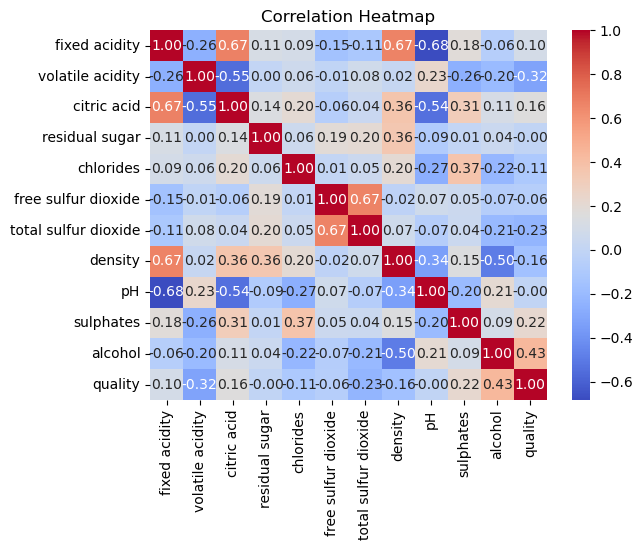

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64

In [10]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

new_df.corr()["quality"].sort_values(ascending = False)

In [11]:
x = new_df.drop("quality", axis=1)
y = new_df["quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101) # (,random_state=101) to ensure that same data is used for testing everytime I run the code

In [12]:
#using Random Forest Classifier 

param = {"n_estimators": [x for x in range(50, 1001, 50)]} #number of decision trees in random forest

#using Grid Search Cross Validation for hyperparameter tuning with cv=10 folds and on accuracy basis.
grid_rf = GridSearchCV(RandomForestClassifier(), param, scoring = "accuracy", cv=10)

grid_rf.fit(x_train, y_train)

print("Best Parameter ->", grid_rf.best_params_)

Best Parameter -> {'n_estimators': 200}


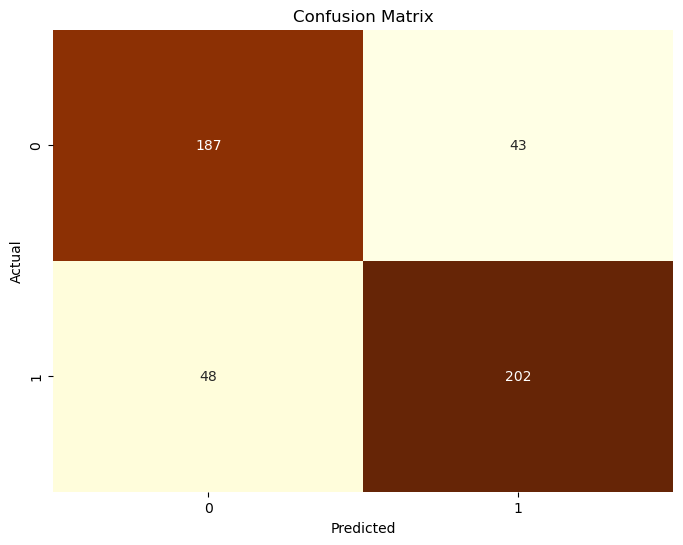

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       230
           1       0.82      0.81      0.82       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



0.8104166666666667


In [13]:
#Wine Quality Prediction

y_pred = grid_rf.predict(x_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d", cmap="YlOrBr", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))
print("\n")

print(accuracy_score(y_test, y_pred))